In [33]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
#read the csv and store the dataset or make dataframe
df = pd.read_csv('BalanceScale.csv')

In [35]:
df.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [36]:
df.shape

(624, 5)

In [37]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   B       624 non-null    object
 1   1       624 non-null    int64 
 2   1.1     624 non-null    int64 
 3   1.2     624 non-null    int64 
 4   1.3     624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [38]:
#this will describe how much data present, mean, std, ma, min etc.
df.describe()

,1,1.1,1.2,1.3
count,624.000000,624.000000,624.000000,624.000000
mean,3.003205,3.003205,3.003205,3.003205
std,1.414210,1.414210,1.414210,1.414210
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [39]:
#importing visulation libraires
import matplotlib.pyplot as plt
import seaborn as sns

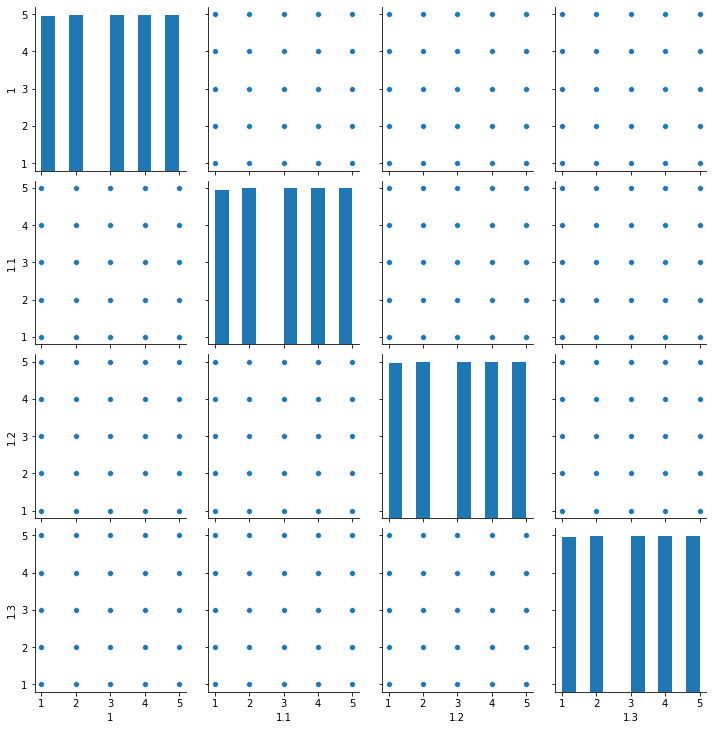

In [40]:
#using pairplot to show co-relation
sns.pairplot(df)

In [41]:
#data slicing and preparing for train-test-split
df_x = df.iloc[:, 1:5]
df_y = df.iloc[:,0]
df_x

,1,1.1,1.2,1.3
0,1,1,1,2
1,1,1,1,3
2,1,1,1,4
3,1,1,1,5
4,1,1,2,1
...,...,...,...,...
619,5,5,5,1
620,5,5,5,2
621,5,5,5,3
622,5,5,5,4


In [42]:
df_y

0      R
1      R
2      R
3      R
4      R
      ..
619    L
620    L
621    L
622    L
623    B
Name: B, Length: 624, dtype: object

In [43]:
#doing train-test-split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [44]:
#importing DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, min_samples_leaf = 5)

In [45]:
#fitting data into DecisionTree model
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       random_state=100)

In [46]:
#lets do a prediction on x_test data
pred = clf.predict(x_test)
pred

array(['R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'L', 'L', 'R', 'B', 'L', 'L', 'R', 'R', 'L', 'B', 'B', 'R',
       'L', 'L', 'L', 'B', 'B', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'B', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'L',
       'B', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'R', 'R', 'B', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'L', 'L', 'R', 'B'], dtype=object)

In [47]:
#while testing on constant values
pred_val = clf.predict([[5,8,9,5]])
pred_val

array(['B'], dtype=object)

In [48]:
ans = pd.DataFrame({'Actual':y_test,'Prediction':pred})
ans

,Actual,Prediction
348,R,R
542,R,R
238,R,R
179,L,L
108,R,R
...,...,...
341,B,L
299,L,L
424,L,L
72,R,R


In [49]:
#lets take a look on confusion matris and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 1  3  5]
 [ 6 52  4]
 [ 3  2 49]]
              precision    recall  f1-score   support

           B       0.10      0.11      0.11         9
           L       0.91      0.84      0.87        62
           R       0.84      0.91      0.88        54

    accuracy                           0.82       125
   macro avg       0.62      0.62      0.62       125
weighted avg       0.82      0.82      0.82       125



In [50]:
#testing accuracy
accuracy_score(y_test, pred)

0.816

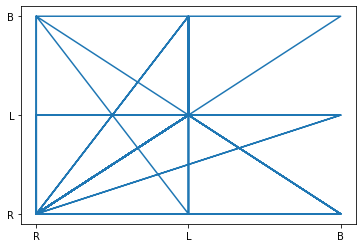

In [51]:
plt.plot(y_test,pred)

In [52]:
#we have used Decision Tree on this dataset and got a good result with 81.6% accuracy lets

In [53]:
#lets use Random Forest Clssifier and see how much we get accuracy.

In [54]:
#importing randomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#making a model of Random Forest Classifier
forest = RandomForestClassifier(random_state=0)
#fit those data into the model
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [55]:
#lets do a prediction on x_test data
y_pred = clf.predict(x_test)
y_pred

array(['R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'L', 'L', 'R', 'B', 'L', 'L', 'R', 'R', 'L', 'B', 'B', 'R',
       'L', 'L', 'L', 'B', 'B', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'B', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'L',
       'B', 'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'R', 'R', 'B', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'L', 'L', 'R', 'B'], dtype=object)

In [56]:
#while testing on constant values
y_pred_val = clf.predict([[4,8,7,6]])
y_pred_val

array(['R'], dtype=object)

In [57]:
ans2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
ans2

,Actual,Prediction
348,R,R
542,R,R
238,R,R
179,L,L
108,R,R
...,...,...
341,B,L
299,L,L
424,L,L
72,R,R


In [58]:
#lets take a look on confusion matris and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1  3  5]
 [ 6 52  4]
 [ 3  2 49]]
              precision    recall  f1-score   support

           B       0.10      0.11      0.11         9
           L       0.91      0.84      0.87        62
           R       0.84      0.91      0.88        54

    accuracy                           0.82       125
   macro avg       0.62      0.62      0.62       125
weighted avg       0.82      0.82      0.82       125



In [59]:
#testing accuracy separately
accuracy_score(y_test, y_pred)

0.816

In [60]:
#As we can see we get almost same accuracy using Random forest classifier.